In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
dataset_path = '/content/drive/MyDrive/gtzan/features_3_sec.csv'
data = pd.read_csv(dataset_path)

In [ ]:
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
data.shape

(9990, 60)

In [ ]:
data.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [ ]:
print("Columns containing missing values",list(data.columns[data.isnull().any()]))

Columns containing missing values []


In [ ]:
from sklearn.preprocessing import LabelEncoder
class_encod=data.iloc[:,-1]
converter=LabelEncoder()
y=converter.fit_transform(class_encod)
y

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
print(data.iloc[:,:-1])

               filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1     blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2     blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3     blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4     blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986   rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987   rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988   rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989   rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean 

In [ ]:
data=data.drop(labels="filename",axis=1)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(data.iloc[:,:-1],dtype=float))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
len(y_test)

2997

In [ ]:
len(y_train)

6993

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
clf1=KNeighborsClassifier(n_neighbors=3)
clf1.fit(X_train,y_train)
y_pred=clf1.predict(X_test)

Training set score: 0.950
Test set score: 0.890
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       314
           1       0.90      0.94      0.92       282
           2       0.80      0.84      0.82       291
           3       0.85      0.91      0.88       316
           4       0.93      0.90      0.92       301
           5       0.87      0.86      0.86       290
           6       0.96      0.96      0.96       297
           7       0.97      0.85      0.90       293
           8       0.88      0.93      0.90       301
           9       0.90      0.79      0.84       312

    accuracy                           0.89      2997
   macro avg       0.89      0.89      0.89      2997
weighted avg       0.89      0.89      0.89      2997



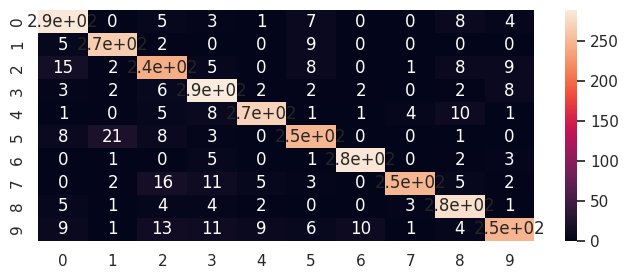

In [ ]:
print("Training set score: {:.3f}".format(clf1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf1.score(X_test, y_test)))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(8,3)})
sns.heatmap(cf_matrix, annot=True)
print(classification_report(y_test,y_pred))